In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
root_dir = os.getcwd()
sys.path.append(root_dir)

In [4]:
from src import datatypes, definitions, electron_functions

In [12]:
def eval_wavefunction(n, l, m, resolution):
    radialdensity = datatypes.RadialElectronDensity(resolution=resolution)

    rr, pp, psps = np.meshgrid(radialdensity.density.coords["r"].data, radialdensity.density.coords["theta"].data, radialdensity.density.coords["phi"].data)
        
    result = electron_functions.wavefunction(n, l, m, rr, pp, psps)

    return result

In [13]:
radialdensity = datatypes.RadialElectronDensity(resolution={"r": 25, "theta":25, "phi": 25})

x, y, z = electron_functions.convert_radial_to_cartesian(radialdensity.density.coords["r"].data, radialdensity.density.coords["theta"].data, radialdensity.density.coords["phi"].data)

rr, pp, psps = np.meshgrid(radialdensity.density.coords["r"].data, radialdensity.density.coords["theta"].data, radialdensity.density.coords["phi"].data)

xx, yy, zz = np.meshgrid(x, y, z)

In [14]:
density = eval_wavefunction(2, 1, 1, {"r": 25, "theta":25, "phi": 25})

In [15]:
mask_d = density.clip(min=0.0000000005)

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/matplotlib/axes/_axes.py:4458: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


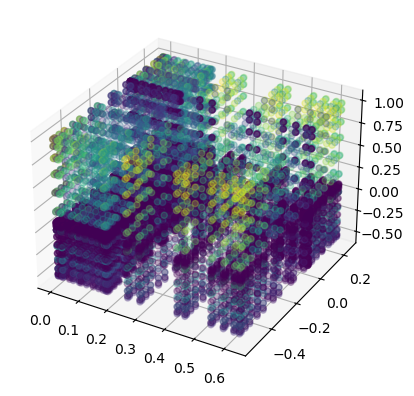

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(xs=xx, ys=yy, zs=zz, c=mask_d, alpha=0.3)

plt.show()

In [ ]:
radialdensity = datatypes.RadialElectronDensity(resolution={"r": 100, "phi":100, "psi": 100})